In [1]:
import pandas as pd
from shapely.geometry import Polygon, MultiPoint


In [2]:
cats = pd.read_csv("data/top_cats_data.csv")

In [3]:
cats.head()

,Unnamed: 0,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,78577,983677208,True,2015-08-15 12:02:16.000,174.861435,-41.137974,NaN,False,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand
1,78578,983677209,True,2015-08-15 12:05:22.000,174.861404,-41.137936,NaN,False,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand
2,78579,983677210,False,2015-08-15 12:08:29.000,174.861542,-41.138115,NaN,True,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand
3,78580,983677211,False,2015-08-15 12:11:36.000,174.861115,-41.137535,NaN,True,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand
4,78581,983677212,False,2015-08-15 12:14:41.000,174.861771,-41.138172,NaN,True,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand


In [4]:
luna = cats[cats['individual-local-identifier'] == "Luna"] 

In [5]:
luna.head()

,Unnamed: 0,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
9948,123031,1017621486,True,2015-09-19 12:02:09.000,175.050461,-41.128876,NaN,False,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand
9949,123032,1017621487,True,2015-09-19 12:05:18.000,175.050262,-41.128883,NaN,False,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand
9950,123033,1017621488,False,2015-09-19 12:08:27.000,175.050293,-41.128960,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand
9951,123034,1017621489,False,2015-09-19 12:12:06.000,175.050446,-41.128845,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand
9952,123035,1017621490,False,2015-09-19 12:15:45.000,175.050583,-41.128906,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand


In [6]:
luna['timeline'] = pd.to_datetime(luna['timestamp'])

/var/folders/mw/92tzvh5x7098x2prk2dnt57w0000gn/T/ipykernel_1305/1792869113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luna['timeline'] = pd.to_datetime(luna['timestamp'])


In [7]:
luna.head()

,Unnamed: 0,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,timeline
9948,123031,1017621486,True,2015-09-19 12:02:09.000,175.050461,-41.128876,NaN,False,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:02:09
9949,123032,1017621487,True,2015-09-19 12:05:18.000,175.050262,-41.128883,NaN,False,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:05:18
9950,123033,1017621488,False,2015-09-19 12:08:27.000,175.050293,-41.128960,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:08:27
9951,123034,1017621489,False,2015-09-19 12:12:06.000,175.050446,-41.128845,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:12:06
9952,123035,1017621490,False,2015-09-19 12:15:45.000,175.050583,-41.128906,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:15:45


In [8]:
luna.timeline.dtypes

dtype('<M8[ns]')

In [9]:
luna.sort_values(by="timeline", ascending=True, inplace=True)

/var/folders/mw/92tzvh5x7098x2prk2dnt57w0000gn/T/ipykernel_1305/4279505210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luna.sort_values(by="timeline", ascending=True, inplace=True)


In [10]:
luna.reset_index(inplace=True, drop=True)
luna.head()

,Unnamed: 0,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,timeline
0,123031,1017621486,True,2015-09-19 12:02:09.000,175.050461,-41.128876,NaN,False,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:02:09
1,123032,1017621487,True,2015-09-19 12:05:18.000,175.050262,-41.128883,NaN,False,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:05:18
2,123033,1017621488,False,2015-09-19 12:08:27.000,175.050293,-41.128960,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:08:27
3,123034,1017621489,False,2015-09-19 12:12:06.000,175.050446,-41.128845,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:12:06
4,123035,1017621490,False,2015-09-19 12:15:45.000,175.050583,-41.128906,NaN,True,gps,Felis catus,LunaTag,Luna,Pet Cats New Zealand,2015-09-19 12:15:45


In [11]:
days = luna.timeline.dt.date.unique()

days

array([datetime.date(2015, 9, 19), datetime.date(2015, 9, 20),
       datetime.date(2015, 9, 21), datetime.date(2015, 9, 22),
       datetime.date(2015, 9, 23), datetime.date(2015, 9, 24),
       datetime.date(2015, 9, 25), datetime.date(2015, 9, 26),
       datetime.date(2015, 9, 27), datetime.date(2015, 9, 28),
       datetime.date(2015, 12, 4), datetime.date(2015, 12, 5),
       datetime.date(2015, 12, 6), datetime.date(2015, 12, 7),
       datetime.date(2015, 12, 8), datetime.date(2015, 12, 9),
       datetime.date(2015, 12, 10), datetime.date(2015, 12, 11)],
      dtype=object)

In [12]:
day_1 = luna[luna.timeline.dt.date == days[0]]

In [13]:
day_1.shape[0]

179

In [14]:
day_2 = luna[luna.timeline.dt.date == days[1]]

In [15]:
day_2.shape[0]

300

In [16]:
xmin, ymin, xmax, ymax = day_1['location-long'].min(), day_1['location-lat'].min(), day_1['location-long'].max(), day_1['location-lat'].max()

print(xmin, ymin, xmax, ymax)

175.04953 -41.129704 175.066498 -41.120335


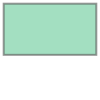

In [17]:
poly_d1 = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])

poly_d1

In [18]:
print(poly_d1.length)

0.0526739999999819


In [19]:
import geopandas as gpd

cat_gdf = gpd.GeoDataFrame(cats, geometry=gpd.points_from_xy(cats['location-long'], cats['location-lat'], crs="EPSG:4326"))

cat_gdf.head(3)

,Unnamed: 0,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,geometry
0,78577,983677208,True,2015-08-15 12:02:16.000,174.861435,-41.137974,NaN,False,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.86144 -41.13797)
1,78578,983677209,True,2015-08-15 12:05:22.000,174.861404,-41.137936,NaN,False,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.8614 -41.13794)
2,78579,983677210,False,2015-08-15 12:08:29.000,174.861542,-41.138115,NaN,True,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.86154 -41.13812)


In [ ]:
cat_gdf.explore(max_bounds=True)

In [21]:
# !pip3 install folium matplotlib mapclassify branca

In [22]:
# cat_gdf.explore(max_bounds=True)

In [23]:
cat_gdf.head()

,Unnamed: 0,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,geometry
0,78577,983677208,True,2015-08-15 12:02:16.000,174.861435,-41.137974,NaN,False,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.86144 -41.13797)
1,78578,983677209,True,2015-08-15 12:05:22.000,174.861404,-41.137936,NaN,False,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.8614 -41.13794)
2,78579,983677210,False,2015-08-15 12:08:29.000,174.861542,-41.138115,NaN,True,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.86154 -41.13812)
3,78580,983677211,False,2015-08-15 12:11:36.000,174.861115,-41.137535,NaN,True,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.86112 -41.13754)
4,78581,983677212,False,2015-08-15 12:14:41.000,174.861771,-41.138172,NaN,True,gps,Felis catus,AslanTag,Aslan,Pet Cats New Zealand,POINT (174.86177 -41.13817)


In [24]:
grouped = cat_gdf.groupby('individual-local-identifier')

print(list(grouped))

[('Aslan',       Unnamed: 0   event-id  visible                timestamp  location-long  \
0          78577  983677208     True  2015-08-15 12:02:16.000     174.861435   
1          78578  983677209     True  2015-08-15 12:05:22.000     174.861404   
2          78579  983677210    False  2015-08-15 12:08:29.000     174.861542   
3          78580  983677211    False  2015-08-15 12:11:36.000     174.861115   
4          78581  983677212    False  2015-08-15 12:14:41.000     174.861771   
...          ...        ...      ...                      ...            ...   
3297       81874  983680505    False  2015-08-23 13:10:31.000     174.861359   
3298       81875  983680506    False  2015-08-23 13:15:13.000     174.861374   
3299       81876  983680507    False  2015-08-23 13:18:32.000     174.861389   
3300       81877  983680508    False  2015-08-23 13:21:58.000     174.861359   
3301       81878  983680509    False  2015-08-23 13:25:02.000     174.861465   

      location-lat algorithm

In [25]:
aggregated_list = []

for cat_name, cat_data in grouped:
  multi_point = MultiPoint(cat_data['geometry'].tolist())
  
  cat_dic = {
    'individual-local-identifier': cat_name,
    'geometry': multi_point
  }
  
  aggregated_list.append(cat_dic)
  
cat_multi = gpd.GeoDataFrame(aggregated_list, geometry='geometry', crs='EPSG:4326')

cat_multi

,individual-local-identifier,geometry
0,Aslan,"MULTIPOINT ((174.86144 -41.13797), (174.8614 -..."
1,BellaII,"MULTIPOINT ((175.05743 -40.83025), (175.05743 ..."
2,Chilli,"MULTIPOINT ((174.88057 -41.11966), (174.87973 ..."
3,Dotti,"MULTIPOINT ((174.94012 -41.20601), (174.94028 ..."
4,Luna,"MULTIPOINT ((175.05046 -41.12888), (175.05026 ..."
5,Penny,"MULTIPOINT ((174.90163 -41.12024), (174.90163 ..."
6,Riggs,"MULTIPOINT ((174.86333 -41.12818), (174.86352 ..."
7,SkyII,"MULTIPOINT ((174.79681 -41.22812), (174.79688 ..."
8,Subie,"MULTIPOINT ((174.79639 -41.22859), (174.79674 ..."
9,Whiskey,"MULTIPOINT ((174.96167 -41.17057), (174.96166 ..."


In [26]:
# cat_multi.explore(column='individual-local-identifier', legend=False, max_bounds=True)

In [27]:
ta = gpd.read_file("data/territorial-authority-2021-generalised.gpkg")

In [28]:
ta.head(3)

,TA2021_V1_00,TA2021_V1_00_NAME,TA2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,032,Central Hawke's Bay District,Central Hawke's Bay District,3333.140233,3333.140233,345764.275012,"MULTIPOLYGON (((1884831.019 5593384.334, 18848..."
1,033,New Plymouth District,New Plymouth District,2205.597503,2205.597503,376935.584957,"MULTIPOLYGON (((1687622.432 5675977.675, 16876..."
2,034,Stratford District,Stratford District,2163.422393,2163.422393,410331.506021,"MULTIPOLYGON (((1761018.863 5693193.903, 17610..."


In [29]:
# ta.explore(max_bounds=True)

In [30]:
ta = ta[~(ta.TA2021_V1_00).isin([999, 67])]

In [31]:
ta.shape

(68, 7)

In [32]:
ta.TA2021_V1_00.dtype

dtype('O')

In [33]:
ta = ta[~(ta.TA2021_V1_00.astype(int)).isin([999, 67])]

In [34]:
ta.shape

(66, 7)

In [35]:
# ta.explore(max_bounds=True)

In [36]:
ta.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
cat_multi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
cat_multi.to_crs(crs='EPSG:2193', inplace=True)

In [39]:
df_join = ta.sjoin(cat_multi, predicate='intersects')

df_join

,TA2021_V1_00,TA2021_V1_00_NAME,TA2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,index_right,individual-local-identifier
11,043,Kapiti Coast District,Kapiti Coast District,731.520085,731.520085,185883.732441,"MULTIPOLYGON (((1760336.972 5471805.753, 17603...",1,BellaII
12,044,Porirua City,Porirua City,174.812639,182.473417,89352.681389,"MULTIPOLYGON (((1749687.248 5451079.937, 17497...",0,Aslan
12,044,Porirua City,Porirua City,174.812639,182.473417,89352.681389,"MULTIPOLYGON (((1749687.248 5451079.937, 17497...",6,Riggs
12,044,Porirua City,Porirua City,174.812639,182.473417,89352.681389,"MULTIPOLYGON (((1749687.248 5451079.937, 17497...",5,Penny
12,044,Porirua City,Porirua City,174.812639,182.473417,89352.681389,"MULTIPOLYGON (((1749687.248 5451079.937, 17497...",2,Chilli
13,045,Upper Hutt City,Upper Hutt City,539.876103,539.876103,128079.796759,"MULTIPOLYGON (((1779683.278 5462979.232, 17797...",4,Luna
14,046,Lower Hutt City,Lower Hutt City,376.403572,376.531841,128654.715907,"MULTIPOLYGON (((1756696.589 5427012.624, 17567...",3,Dotti
14,046,Lower Hutt City,Lower Hutt City,376.403572,376.531841,128654.715907,"MULTIPOLYGON (((1756696.589 5427012.624, 17567...",9,Whiskey
15,047,Wellington City,Wellington City,289.910046,290.046230,130606.342983,"MULTIPOLYGON (((1748467.58 5420994.674, 174845...",7,SkyII
15,047,Wellington City,Wellington City,289.910046,290.046230,130606.342983,"MULTIPOLYGON (((1748467.58 5420994.674, 174845...",8,Subie


In [40]:
cats_ta = df_join.groupby('TA2021_V1_00')['individual-local-identifier'].count()

cats_ta

TA2021_V1_00
043    1
044    4
045    1
046    2
047    2
Name: individual-local-identifier, dtype: int64

In [41]:
cats_ta = cats_ta.to_frame(name='cats_count').reset_index()

In [42]:
cats_ta

,TA2021_V1_00,cats_count
0,043,1
1,044,4
2,045,1
3,046,2
4,047,2


In [43]:
ta_cat_count = ta.merge(cats_ta, how="left", on='TA2021_V1_00')

ta_cat_count.head(3)

,TA2021_V1_00,TA2021_V1_00_NAME,TA2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,cats_count
0,032,Central Hawke's Bay District,Central Hawke's Bay District,3333.140233,3333.140233,345764.275012,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",NaN
1,033,New Plymouth District,New Plymouth District,2205.597503,2205.597503,376935.584957,"MULTIPOLYGON (((1687622.432 5675977.675, 16876...",NaN
2,034,Stratford District,Stratford District,2163.422393,2163.422393,410331.506021,"MULTIPOLYGON (((1761018.863 5693193.903, 17610...",NaN


In [44]:
# ta_cat_count.explore(column='cats_count', max_bounds=True)

In [45]:
welli = ta[ta['TA2021_V1_00'].isin(['047', '044'])]

welli

,TA2021_V1_00,TA2021_V1_00_NAME,TA2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
12,044,Porirua City,Porirua City,174.812639,182.473417,89352.681389,"MULTIPOLYGON (((1749687.248 5451079.937, 17497..."
15,047,Wellington City,Wellington City,289.910046,290.046230,130606.342983,"MULTIPOLYGON (((1748467.58 5420994.674, 174845..."


In [46]:
# welli.explore(max_bounds=True)

In [47]:
cats_welli = gpd.clip(cat_multi, welli)

In [ ]:
cats_welli.explore(column='individual-local-identifier', legend=True,max_bounds=True)

In [49]:
home_ranges=cats_welli.convex_hull

home_ranges.head(5)

7    POLYGON ((1750454.42 5433830.304, 1750430.551 ...
8    POLYGON ((1750627.194 5434144.944, 1750463.175...
0    POLYGON ((1756485.968 5443513.757, 1755713.694...
6    POLYGON ((1756259.61 5444075.291, 1755537.732 ...
5    POLYGON ((1760774.143 5443924.807, 1759311.177...
dtype: geometry

In [50]:
cats_welli.head(10)

,individual-local-identifier,geometry
7,SkyII,"MULTIPOINT ((1750430.551 5434286.289), (175045..."
8,Subie,"MULTIPOINT ((1750369.836 5435126.887), (175046..."
0,Aslan,"MULTIPOINT ((1755713.694 5443770.061), (175586..."
6,Riggs,"MULTIPOINT ((1755537.732 5445313.911), (175558..."
5,Penny,"MULTIPOINT ((1758824.996 5444084.842), (175897..."
2,Chilli,"MULTIPOINT ((1757255.742 5445707.219), (175746..."


In [51]:
home_ranges.rename('hr', inplace=True)

home_ranges.head(5)

7    POLYGON ((1750454.42 5433830.304, 1750430.551 ...
8    POLYGON ((1750627.194 5434144.944, 1750463.175...
0    POLYGON ((1756485.968 5443513.757, 1755713.694...
6    POLYGON ((1756259.61 5444075.291, 1755537.732 ...
5    POLYGON ((1760774.143 5443924.807, 1759311.177...
Name: hr, dtype: geometry

In [52]:
home_ranges = pd.merge(home_ranges, cats_welli['individual-local-identifier'], left_index=True, right_index=True, how='inner')

home_ranges

,hr,individual-local-identifier
7,"POLYGON ((1750454.42 5433830.304, 1750430.551 ...",SkyII
8,"POLYGON ((1750627.194 5434144.944, 1750463.175...",Subie
0,"POLYGON ((1756485.968 5443513.757, 1755713.694...",Aslan
6,"POLYGON ((1756259.61 5444075.291, 1755537.732 ...",Riggs
5,"POLYGON ((1760774.143 5443924.807, 1759311.177...",Penny
2,"POLYGON ((1759066.426 5445466.78, 1757255.742 ...",Chilli


In [55]:
home_ranges.set_geometry('hr', inplace=True)

In [56]:
home_ranges.rename(columns={'individual-local-identifier': 'cat'}, inplace=True)

home_ranges

,hr,cat
7,"POLYGON ((1750454.42 5433830.304, 1750430.551 ...",SkyII
8,"POLYGON ((1750627.194 5434144.944, 1750463.175...",Subie
0,"POLYGON ((1756485.968 5443513.757, 1755713.694...",Aslan
6,"POLYGON ((1756259.61 5444075.291, 1755537.732 ...",Riggs
5,"POLYGON ((1760774.143 5443924.807, 1759311.177...",Penny
2,"POLYGON ((1759066.426 5445466.78, 1757255.742 ...",Chilli


In [ ]:
home_ranges.explore(max_bounds=True, column='cat')

In [58]:
home_ranges['area_hr'] = home_ranges['hr'].area

home_ranges

,hr,cat,area_hr
7,"POLYGON ((1750454.42 5433830.304, 1750430.551 ...",SkyII,1.800196e+06
8,"POLYGON ((1750627.194 5434144.944, 1750463.175...",Subie,7.869041e+05
0,"POLYGON ((1756485.968 5443513.757, 1755713.694...",Aslan,7.476339e+05
6,"POLYGON ((1756259.61 5444075.291, 1755537.732 ...",Riggs,1.248067e+06
5,"POLYGON ((1760774.143 5443924.807, 1759311.177...",Penny,3.966667e+06
2,"POLYGON ((1759066.426 5445466.78, 1757255.742 ...",Chilli,1.274793e+06


In [59]:
home_ranges.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [60]:
home_ranges['area_hr_km'] = home_ranges['area_hr'] / 1000000

home_ranges

,hr,cat,area_hr,area_hr_km
7,"POLYGON ((1750454.42 5433830.304, 1750430.551 ...",SkyII,1.800196e+06,1.800196
8,"POLYGON ((1750627.194 5434144.944, 1750463.175...",Subie,7.869041e+05,0.786904
0,"POLYGON ((1756485.968 5443513.757, 1755713.694...",Aslan,7.476339e+05,0.747634
6,"POLYGON ((1756259.61 5444075.291, 1755537.732 ...",Riggs,1.248067e+06,1.248067
5,"POLYGON ((1760774.143 5443924.807, 1759311.177...",Penny,3.966667e+06,3.966667
2,"POLYGON ((1759066.426 5445466.78, 1757255.742 ...",Chilli,1.274793e+06,1.274793


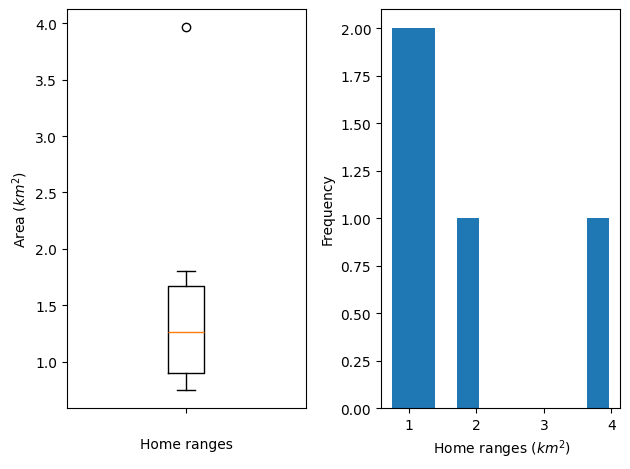

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, nrows=1)

ax[0].boxplot(home_ranges['area_hr_km'])
ax[0].set_xlabel('Home ranges')
ax[0].set_xticklabels([' '])
ax[0].set_ylabel('Area ($km^{2}$)')

ax[1].hist(home_ranges['area_hr_km'])
ax[1].set_xlabel(' Home ranges ($km^{2}$)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [65]:
cats_centroids = home_ranges.centroid

cats_centroids

7    POINT (1751363.988 5434736.062)
8    POINT (1750844.941 5434775.268)
0    POINT (1756218.005 5444070.124)
6    POINT (1756284.225 5445042.702)
5    POINT (1759951.984 5445078.369)
2    POINT (1758053.724 5446048.649)
dtype: geometry

In [66]:
cats_centroids.rename('centroid', inplace=True)

cats_centroids

7    POINT (1751363.988 5434736.062)
8    POINT (1750844.941 5434775.268)
0    POINT (1756218.005 5444070.124)
6    POINT (1756284.225 5445042.702)
5    POINT (1759951.984 5445078.369)
2    POINT (1758053.724 5446048.649)
Name: centroid, dtype: geometry

In [67]:
cats_centroid = pd.merge(cats_centroids, home_ranges['cat'], left_index=True, right_index=True, how='inner')

cats_centroid

,centroid,cat
7,POINT (1751363.988 5434736.062),SkyII
8,POINT (1750844.941 5434775.268),Subie
0,POINT (1756218.005 5444070.124),Aslan
6,POINT (1756284.225 5445042.702),Riggs
5,POINT (1759951.984 5445078.369),Penny
2,POINT (1758053.724 5446048.649),Chilli


In [ ]:
cats_centroid.explore(max_bounds=True, column='cat')

In [70]:
cats_centroid = pd.merge(cats_centroid, home_ranges['hr'], how='inner', left_index=True, right_index=True)

cats_centroid

,centroid,cat,hr
7,POINT (1751363.988 5434736.062),SkyII,"POLYGON ((1750454.42 5433830.304, 1750430.551 ..."
8,POINT (1750844.941 5434775.268),Subie,"POLYGON ((1750627.194 5434144.944, 1750463.175..."
0,POINT (1756218.005 5444070.124),Aslan,"POLYGON ((1756485.968 5443513.757, 1755713.694..."
6,POINT (1756284.225 5445042.702),Riggs,"POLYGON ((1756259.61 5444075.291, 1755537.732 ..."
5,POINT (1759951.984 5445078.369),Penny,"POLYGON ((1760774.143 5443924.807, 1759311.177..."
2,POINT (1758053.724 5446048.649),Chilli,"POLYGON ((1759066.426 5445466.78, 1757255.742 ..."


/var/folders/mw/92tzvh5x7098x2prk2dnt57w0000gn/T/ipykernel_1305/2455808311.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ax = cats_centroid.plot(column='cat', color='red')


<Axes: >

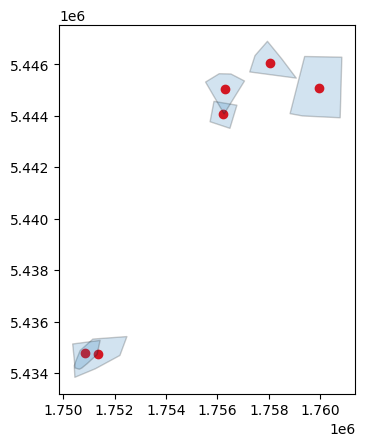

In [78]:
cats_centroid.set_geometry('centroid', inplace=True)

ax = cats_centroid.plot(column='cat', color='red')

cats_centroid.set_geometry('hr', inplace=True)

cats_centroid.plot(ax=ax, alpha=0.2, edgecolor='black')

In [ ]:
cats_centroid.set_geometry('hr', inplace=True)
ax = cats_centroid.explore(column='cat', max_bounds=True, alpha=0.2)

cats_centroid.set_geometry('centroid', inplace=True)

cats_centroid.explore(ax = ax, column='cat')

ax

In [87]:
cats_buffer = cats_centroid.buffer(400, resolution=100)

cats_buffer

7    POLYGON ((1751763.988 5434736.062, 1751763.938...
8    POLYGON ((1751244.941 5434775.268, 1751244.892...
0    POLYGON ((1756618.005 5444070.124, 1756617.956...
6    POLYGON ((1756684.225 5445042.702, 1756684.176...
5    POLYGON ((1760351.984 5445078.369, 1760351.935...
2    POLYGON ((1758453.724 5446048.649, 1758453.675...
dtype: geometry

In [ ]:
cats_buffer.explore(max_bounds=True)

/var/folders/mw/92tzvh5x7098x2prk2dnt57w0000gn/T/ipykernel_1305/354743033.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cat_zone = cats_buffer.unary_union


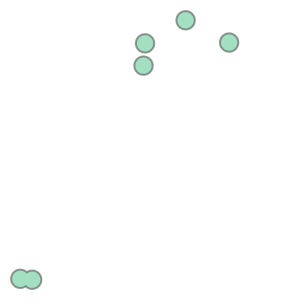

In [89]:
cat_zone = cats_buffer.unary_union

cat_zone

In [ ]:
influence_cat = gpd.GeoDataFrame(data={'Name': ['domestic cats']}, geometry=[cat_zone], crs=cats_buffer.crs)

influence_cat.explore(max_bounds=True)

In [91]:
print(influence_cat)

            Name                                           geometry
0  domestic cats  MULTIPOLYGON (((1751763.79 5434723.497, 175176...


In [92]:
population = gpd.read_file('data/censu_2018_pop.gpkg')

population.head()

,SA12018_V1_00,C18_CURPop,geometry
0,7000006,105,"MULTIPOLYGON (((1605432.509 6159874.214, 16054..."
1,7000010,0,"MULTIPOLYGON (((1607386.316 6153776.188, 16073..."
2,7000033,138,"MULTIPOLYGON (((1636338.253 6150839.03, 163634..."
3,7000042,240,"MULTIPOLYGON (((1649982.896 6126860.824, 16499..."
4,7000035,237,"MULTIPOLYGON (((1634014.87 6139661.98, 1633986..."


In [95]:
population.rename(columns={'SA12018_V1_00': 'population', 'C18_CURPop': 'current_population'}, inplace=True)

population.head()

,population,current_population,geometry
0,7000006,105,"MULTIPOLYGON (((1605432.509 6159874.214, 16054..."
1,7000010,0,"MULTIPOLYGON (((1607386.316 6153776.188, 16073..."
2,7000033,138,"MULTIPOLYGON (((1636338.253 6150839.03, 163634..."
3,7000042,240,"MULTIPOLYGON (((1649982.896 6126860.824, 16499..."
4,7000035,237,"MULTIPOLYGON (((1634014.87 6139661.98, 1633986..."


In [96]:
population = gpd.overlay(population, influence_cat, how='intersection', keep_geom_type=False)

population.head()

,population,current_population,Name,geometry
0,7019521,81,domestic cats,"MULTIPOLYGON (((1758053.98 5445657.428, 175806..."
1,7019631,204,domestic cats,"POLYGON ((1756329.874 5445393.56, 1756337.811 ..."
2,7019632,111,domestic cats,"POLYGON ((1756480.795 5445358.88, 1756450.91 5..."
3,7019633,105,domestic cats,"POLYGON ((1756544.702 5445306.336, 1756521.965..."
4,7019634,174,domestic cats,"POLYGON ((1756439.706 5445156.206, 1756441.429..."


In [ ]:
population.explore(max_bounds=True)

In [98]:
population.current_population.sum()

np.int64(11055)

In [99]:
population.to_file('data/output/pop_census_vs_cat.gpkg')